# InceptionTime Model 
# on Time Series EMG Classification on Ninapro Dataset [Wrist Motions]

InceptionTime is a 1D Convolution based Deep Neural Network model which is currently quoted as the state of the art TSC model from the published paper [InceptionTime: Finding AlexNet for Time Series Classification](https://arxiv.org/abs/1909.04939).

#### Understanding Data
Input data will be a 2D matrix which has rows as the time-step and columns as emg channels.
Window Length X No.EMG Sensors

#### Model Accuracy  Results

In [38]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import glob
import warnings
from tqdm.notebook import trange, tqdm
from keras.utils import to_categorical
from random import randrange
# warnings.filterwarnings(action='once')
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

## Import the Prepared Datasets

In [39]:
win_len = 250
X = np.load('prepared_data/norest_X_all_wrist_{}_40.npy'.format(win_len))
y = np.load('prepared_data/norest_Y_hot_all_wrist_{}_40.npy'.format(win_len))
Y_stim = np.load('prepared_data/norest_Y_all_wrist_{}_40.npy'.format(win_len))

In [40]:
X = np.reshape(X,(X.shape[0],X.shape[1],X.shape[2]))
X.shape

(370616, 250, 12)

In [41]:
y.shape

(370616, 9)

In [42]:
y_true = []
for d in y_test:
    idx = list(d).index(1)
    y_true.append(idx)

### Data Bias Check (Remove Rest Bias)

In [43]:
def countX(lst, x): 
    count = 0
    for ele in lst: 
        if (ele == x): 
            count = count + 1
    return count 

### Merge, Shuffle and Split

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

##### Keep only 8 EMG data

In [86]:
def rm_columns(X,n):
#     X_r = list(np.zeros((X.shape[0],X.shape[1],X.shape[2]-n)))
    X_r = []
    for i in tqdm(range(len(X))):
        d = np.copy(X[i])
        for i in range(n):
            d = np.delete(d, -1, 1)
        X_r.append(d)
    return np.array(X_r)

In [87]:
X_train = rm_columns(X_train,4)
X_test = rm_columns(X_test,4)

In [88]:
print('X Train Shape =',X_train.shape)
print('Y Train Shape =',y_train.shape)
print('X Test Shape =',X_test.shape)
print('Y Test Shape =',y_test.shape)

X Train Shape = (296492, 250, 8)
Y Train Shape = (296492, 9)
X Test Shape = (74124, 250, 8)
Y Test Shape = (74124, 9)


## Normalization Section

In [89]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [90]:
def normalize_samples(X):
    scaler = MinMaxScaler()
    X_new = []
    for i in tqdm(range(len(X))):
        d = scaler.fit(X[i])
        X_new.append(scaler.transform(X[i]))
    return np.array(X_new)
scaler = StandardScaler()
def normalize_whole(data):
    num_instances, num_time_steps, num_features = data.shape
    data = np.reshape(data,(-1, num_features))
    data = scaler.fit_transform(data)
    data = np.reshape(data,(num_instances, num_time_steps, num_features))
    return data

In [91]:
X_train = normalize_whole(X_train)
num_instances, num_time_steps, num_features = X_test.shape
X_test = np.reshape(X_test,(-1, num_features))
X_test = scaler.transform(X_test)
X_test = np.reshape(X_test,(num_instances, num_time_steps, num_features))

In [92]:
print('X Train Shape =',X_train.shape)
print('Y Train Shape =',y_train.shape)
print('X Test Shape =',X_test.shape)
print('Y Test Shape =',y_test.shape)

X Train Shape = (296492, 250, 8)
Y Train Shape = (296492, 9)
X Test Shape = (74124, 250, 8)
Y Test Shape = (74124, 9)


#### Save and Quick Load Prepared Data
###### Save

In [93]:
np.save('prepared_data/X_train_s40',X_train)
np.save('prepared_data/y_train_s40',y_train)
np.save('prepared_data/X_test_s40',X_test)
np.save('prepared_data/y_test_s40',y_test)

#### Load 

In [78]:
X_train = np.load('prepared_data/X_train_s40.npy')
y_train = np.load('prepared_data/y_train_s40.npy')
X_test = np.load('prepared_data/X_test_s40.npy')
y_test = np.load('prepared_data/y_test_s40.npy')
print('X Train Shape =',X_train.shape)
print('Y Train Shape =',y_train.shape)
print('X Test Shape =',X_test.shape)
print('Y Test Shape =',y_test.shape)

X Train Shape = (296492, 250, 8)
Y Train Shape = (296492, 9)
X Test Shape = (18531000, 8)
Y Test Shape = (74124, 9)


# InceptionTime Trainer

In [94]:
import numpy as np
import sklearn
import pandas as pd
import sys
import subprocess
import tensorflow as tf
from InceptionTime.classifiers.inception import Classifier_INCEPTION

In [95]:
 clf = Classifier_INCEPTION('', (X_train.shape[1],X_train.shape[2]),nb_classes=9,
                            verbose=True,batch_size=500,nb_epochs=50,nb_filters=16,
                            depth=10, kernel_size=11)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 250, 8)]     0                                            
__________________________________________________________________________________________________
conv1d_318 (Conv1D)             (None, 250, 32)      256         input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_60 (MaxPooling1D) (None, 250, 8)       0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_319 (Conv1D)             (None, 250, 16)      5120        conv1d_318[0][0]                 
____________________________________________________________________________________________

In [ ]:
df_metrics = clf.fit(X_train, y_train, X_test, y_test, y_true,plot_test_acc=True)

Epoch 1/50
456/593 [======================>.......] - ETA: 25s - loss: 1.6320 - accuracy: 0.3869- ETA: 57s - loss: 1.699 - ETA: 53s - loss: 1.6895 - accuracy:  - ETA - ET - ETA: 38s - loss

## Plot Results

In [103]:
%matplotlib inline
metrics_df = pd.read_csv('df_metrics.csv')
best_model_df = pd.read_csv('df_best_model.csv')
history_df = pd.read_csv('history.csv')

In [104]:
metrics_df

,precision,accuracy,recall,duration
0,0.533952,0.499808,0.501465,2130.652461


<AxesSubplot:title={'center':'Loss'}>

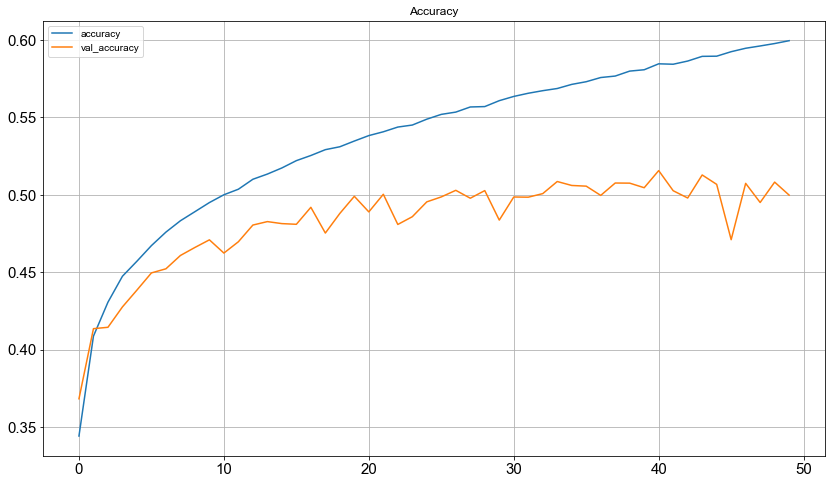

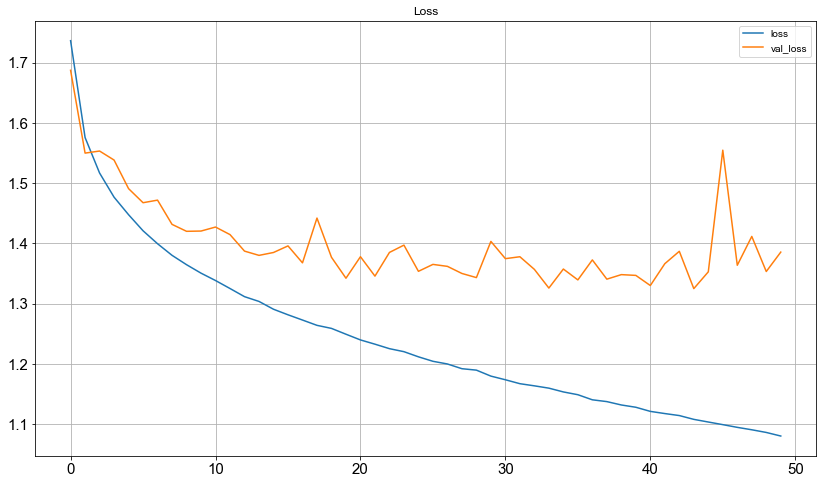

In [105]:
history_df[['accuracy','val_accuracy']].plot(figsize=(14,8),title='Accuracy',grid=True,fontsize=15)
history_df[['loss','val_loss']].plot(figsize=(14,8),title='Loss',grid=True,fontsize=15)

# Import Model and Classify Function Definition

In [20]:
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

model = load_model('best_model.hdf5')
model.summary()

def classify_emg(data):
    data = np.array(data) 
    data = np.reshape(data,(1,100,8))
    pred = model.predict(data,batch_size=1)[0]
    print(pred)
    return pred


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100, 8)]     0                                            
__________________________________________________________________________________________________
conv1d_96 (Conv1D)              (None, 100, 32)      256         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_18 (MaxPooling1D) (None, 100, 8)       0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_97 (Conv1D)              (None, 100, 32)      34816       conv1d_96[0][0]                  
____________________________________________________________________________________________

## Real time CNN Classifier Example
**Input Data** - The single Input data matrix sent in 20Khz freaquency,Has rows as time steps and columns as feature

### Input Sequence Data from DF

In [ ]:
# Total Pronation sequences = 330709
# Total Radial sequences = 148426 

sequence = 50 

df = pronation_df.reset_index(drop=True)
# df = radial_df.reset_index(drop=True)

data = df.loc[sequence*10:sequence*10+19] # The 20 step data Input Matrix
print('Input Data')
print(data.drop(['Label'],1).shape)
data

In [ ]:
print('True = ',data['Label'].tolist()[0])
data = data.drop(['Label'],1)
print('Predicted = ',classify_emg(data)) # Predict

### with Testing Dataset

In [33]:
classify_emg(X_test[6])
print(y_true[6])

[9.0655744e-01 1.4131619e-02 1.6764328e-02 3.5939828e-02 1.4772802e-03
 2.1945729e-04 1.9629999e-05 2.4084592e-02 7.9609273e-04 9.7370257e-06]
0


In [ ]:
n = 2 
data = X_test[n] 
true = y_test[n]
print('Input shape = ',data.shape)


In [ ]:
if(true[0]==1):
    print('True = Pronation')
else:
    print('True = Radial')
print('Predicted = ',classify_emg(data)) # Predict